In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from micrograd.engine import Value
from micrograd.nn import Neuron, Layer, MLP

In [5]:
np.random.seed(1337)
random.seed(1337)

In [6]:
from sklearn.datasets import make_moons, make_blobs

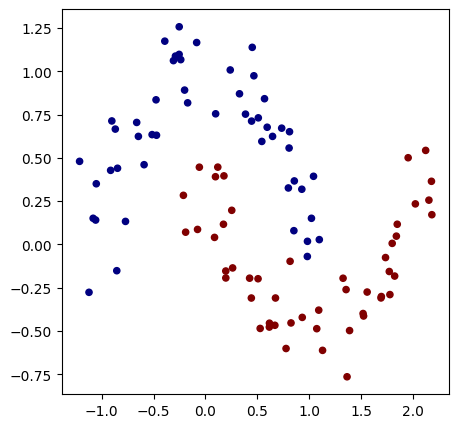

In [12]:
#make up dataset

from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples= 100, noise=0.15)

y = y*2 - 1 #make y be -1 or 1
#visualising in 2d
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c = y, s = 20, cmap= 'jet')

In [13]:
#initialize a model
model = MLP(2, [16, 16, 1]) #2-layer nn
print(model)
print("Number of parameters", len(model.parameters()))

MLP of [Layer of [ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2)], Layer of [ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16)], Layer of [LinearNeuron(16)]]
Number of parameters 337


In [16]:
#Loss Function

def loss(batch_size = None):
    
    # inline DataLoader
    if batch_size is None:
        Xb, yb, = X, y
    
    else:
        ri = np.random.permutation(X.shape[0])[: batch_size]
        Xb, yb = X[ri], y[ri]
    inputs = [list (map(Value, xrow)) for xrow in Xb]

    # forward the modle to fget scores 
    scores = list(map(model, inputs))

    #svm "max-margin" loss
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))

    #L2 regularization 
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))

    total_loss = data_loss + reg_loss

    #also fet accuracy 
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss()
print(total_loss)

Value(data=0.9124748859559332, grad=0)
